In [1]:
import pandas as pd
import numpy as np
import pickle
import spacy

Здесь построены roc и pr кривые при обработке эмбеддингов lg моделью, просто по рандомной 200к выборке из подчищенных классов

Проанализировано 2 ступени, первая и вторая, видим что точность падает, но всё же неплохие результаты для больших классов

Лог регрессия по первой ступени строится 900 ~ 10 минут секунд, по второй 4000 ~ 1 час

In [2]:
#!pip install spacy

In [3]:
#!python -m spacy download ru_core_news_lg

In [5]:
df_filtered = pd.read_pickle("df_filtered.pkl")
df_filtered

text         OKPD2  \
0                                             укроп свежий  01.13.19.000   
1                                                   яблоки  01.24.10.000   
2                                         капуста брокколи  01.13.13.000   
3                                         морковь столовая  01.13.41.110   
4                           яйца куриные в скорлупе свежие  01.47.21.000   
...                                                    ...           ...   
8558341     ш-15 (р-152) ежегодное освидетельствование\r\n  99.00.10.000   
8558342  кпл-1 (р-99) наружное освидетельствование сосу...  99.00.10.000   
8558343  жулан (391а) внеочередное освидетельствование....  99.00.10.000   
8558344     дтс-2 (306к) ежегодное освидетельствование\r\n  99.00.10.000   
8558345  камский-212 (92-035) i этап очередного освидет...  99.00.10.000   

         1_step  2_steps  3_steps    4_steps  
0             1      113    11319   11319000  
1             1      124    12410   12410000  
2             1      113    11313   11313000  
3             1      113    11341   11341110  
4             1      147    14721   14721000  
...         ...      ...      ...        ...  
8558341      99     9900   990010  990010000  
8558342      99     9900   990010  990010000  
8558343      99     9900   990010  990010000  
8558344      99     9900   990010  990010000  
8558345      99     9900   990010  990010000  

[8438933 rows x 6 columns]

In [6]:
sample_t = df_filtered.sample(n=200000, random_state=15151)

In [7]:
sample_t.groupby('1_step')['text'].count().sort_values()

1_step
99       5
3       11
50      12
69      18
72      28
      ... 
71    5926
95    5950
33    5956
21    5973
81    5992
Name: text, Length: 81, dtype: int64

In [8]:
sample_t

text         OKPD2  \
2977026  картридж совместимый аналог се285а (совместимы...  28.23.25.000   
2801354                                    лампа фотометра  27.40.14.000   
7756193  оказание услуг по организации и проведению фес...  82.30.12.000   
8444147  ноутбук - ремонт ноутбука, при необходимости з...  95.11.10.000   
537598                           вода питьевая упакованная  11.07.11.120   
...                                                    ...           ...   
6624196  замена kyocera mita 2c920061 | 2c920060 | 2695...  62.02.30.000   
4966106     полы: тип пола 7 (лср 02-01-02  поз. 527-539.)  41.20.40.900   
1062007                                    папка картонная  17.23.13.193   
3528706                                  соединитель рядов  31.01.11.130   
4949779  выполнение работ по капитальному ремонту объек...  41.20.40.000   

         1_step  2_steps  3_steps    4_steps  
2977026      28     2823   282325  282325000  
2801354      27     2740   274014  274014000  
7756193      82     8230   823012  823012000  
8444147      95     9511   951110  951110000  
537598       11     1107   110711  110711120  
...         ...      ...      ...        ...  
6624196      62     6202   620230  620230000  
4966106      41     4120   412040  412040900  
1062007      17     1723   172313  172313193  
3528706      31     3101   310111  310111130  
4949779      41     4120   412040  412040000  

[200000 rows x 6 columns]

In [9]:
# nlp_sm = spacy.load('ru_core_news_sm')  

Выделили отдельно массив текстовых описаний

In [10]:
text = list(sample_t['text'])

Построение эмбеддингов по текстовым описаниям

In [11]:
nlp = spacy.load('ru_core_news_lg')  

In [13]:
#import time
#start_time = time.time()

#embeddings = [nlp(stat).vector for stat in text]

#print("--- %s seconds ---" % (time.time() - start_time))

### Checkpoint

In [14]:
#embeddings_series = pd.Series(list(embeddings))

In [15]:
# embeddings_series.to_pickle("embeddings.pkl")

In [12]:
embeddings_series = pd.read_pickle("embeddings.pkl")
embeddings_series

0         [0.019284109, 0.06931859, -0.026370427, -0.049...
1         [0.29879206, -0.00051734125, 0.384319, -0.1886...
2         [0.070813164, 0.03513415, -0.13148262, 0.19178...
3         [0.098045796, -0.17472434, -0.11275521, 0.0722...
4         [-0.15238628, -0.0963868, 0.5242327, 0.0687940...
                                ...                        
199995    [-0.04309273, -0.01278837, -0.029306736, -0.09...
199996    [-0.0036510923, -0.03853069, -0.027658451, 0.0...
199997    [0.04611273, -0.016290642, 0.032936156, -0.126...
199998    [-0.104318514, 0.0676265, -0.24165319, -0.0837...
199999    [0.030129373, -0.05618882, -0.14532474, 0.0129...
Length: 200000, dtype: object

In [16]:
embeddings = list(embeddings_series)

Создание массива меток (оставляем только первые 4 цифры классификатора)

In [ ]:
# labels = np.array([int(''.join(code[:5].split('.'))) for code in table_2_10_6['OKPD2']])

In [60]:
labels = sample_t['1_step']

Разбиение выборки на train и test

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(embeddings, labels, test_size=0.2, random_state=42)

Лог регрессия из sklearn

In [62]:
from sklearn.linear_model import LogisticRegression

start_time = time.time()
model = LogisticRegression(max_iter=2000, multi_class='ovr', solver ='newton-cg' )  # Увеличение количества итераций для сходимости
model.fit(X_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 914.9458014965057 seconds ---


Построение ROC кривой

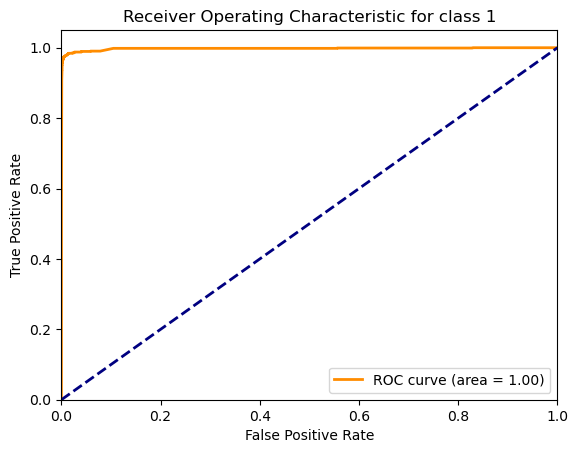

In [63]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Бинаризация меток для многоклассовой классификации
y_test_binarized = label_binarize(y_test, classes=np.unique(labels))

# Предсказание вероятностей для всех классов
y_score = model.predict_proba(X_test)

# Вычисление ROC AUC для каждого класса
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_test_binarized.shape[1]-1):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Построение ROC-кривой для первого класса
plt.figure()
plt.plot(fpr[0], tpr[0], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for class 1')
plt.legend(loc="lower right")
plt.show()


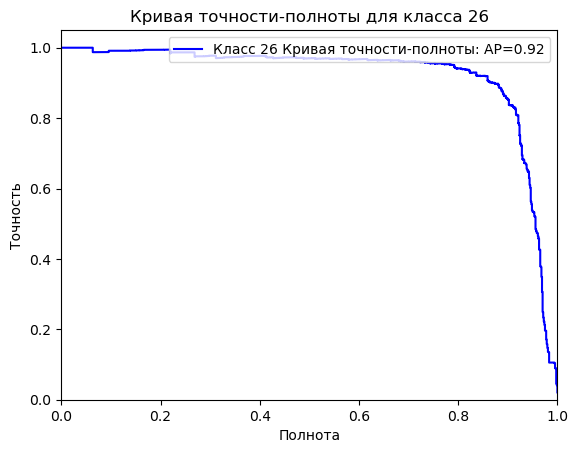

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Пример настройки (замените на ваши реальные данные)
# y_test_binarized = np.random.randint(2, size=(100, 15))  # Бинарные метки для 100 образцов по 15 классам
# y_score = np.random.rand(100, 15)  # Предсказания оценок для 100 образцов по 15 классам

# Инициализация словарей
precision = dict()
recall = dict()
average_precision = dict()

# Расчет точности и полноты для каждого класса
for i in range(y_test_binarized.shape[1]):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test_binarized[:, i], y_score[:, i])

# Выбор номера класса для визуализации
class_number = 26

# Построение графика кривой точности-полноты
plt.figure()
plt.step(recall[class_number], precision[class_number], where='post', color='blue', 
         label='Класс %d Кривая точности-полноты: AP=%0.2f' % (class_number, average_precision[class_number]))
plt.xlabel('Полнота')
plt.ylabel('Точность')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая точности-полноты для класса %d' % class_number)
plt.legend(loc="upper right")
plt.show()


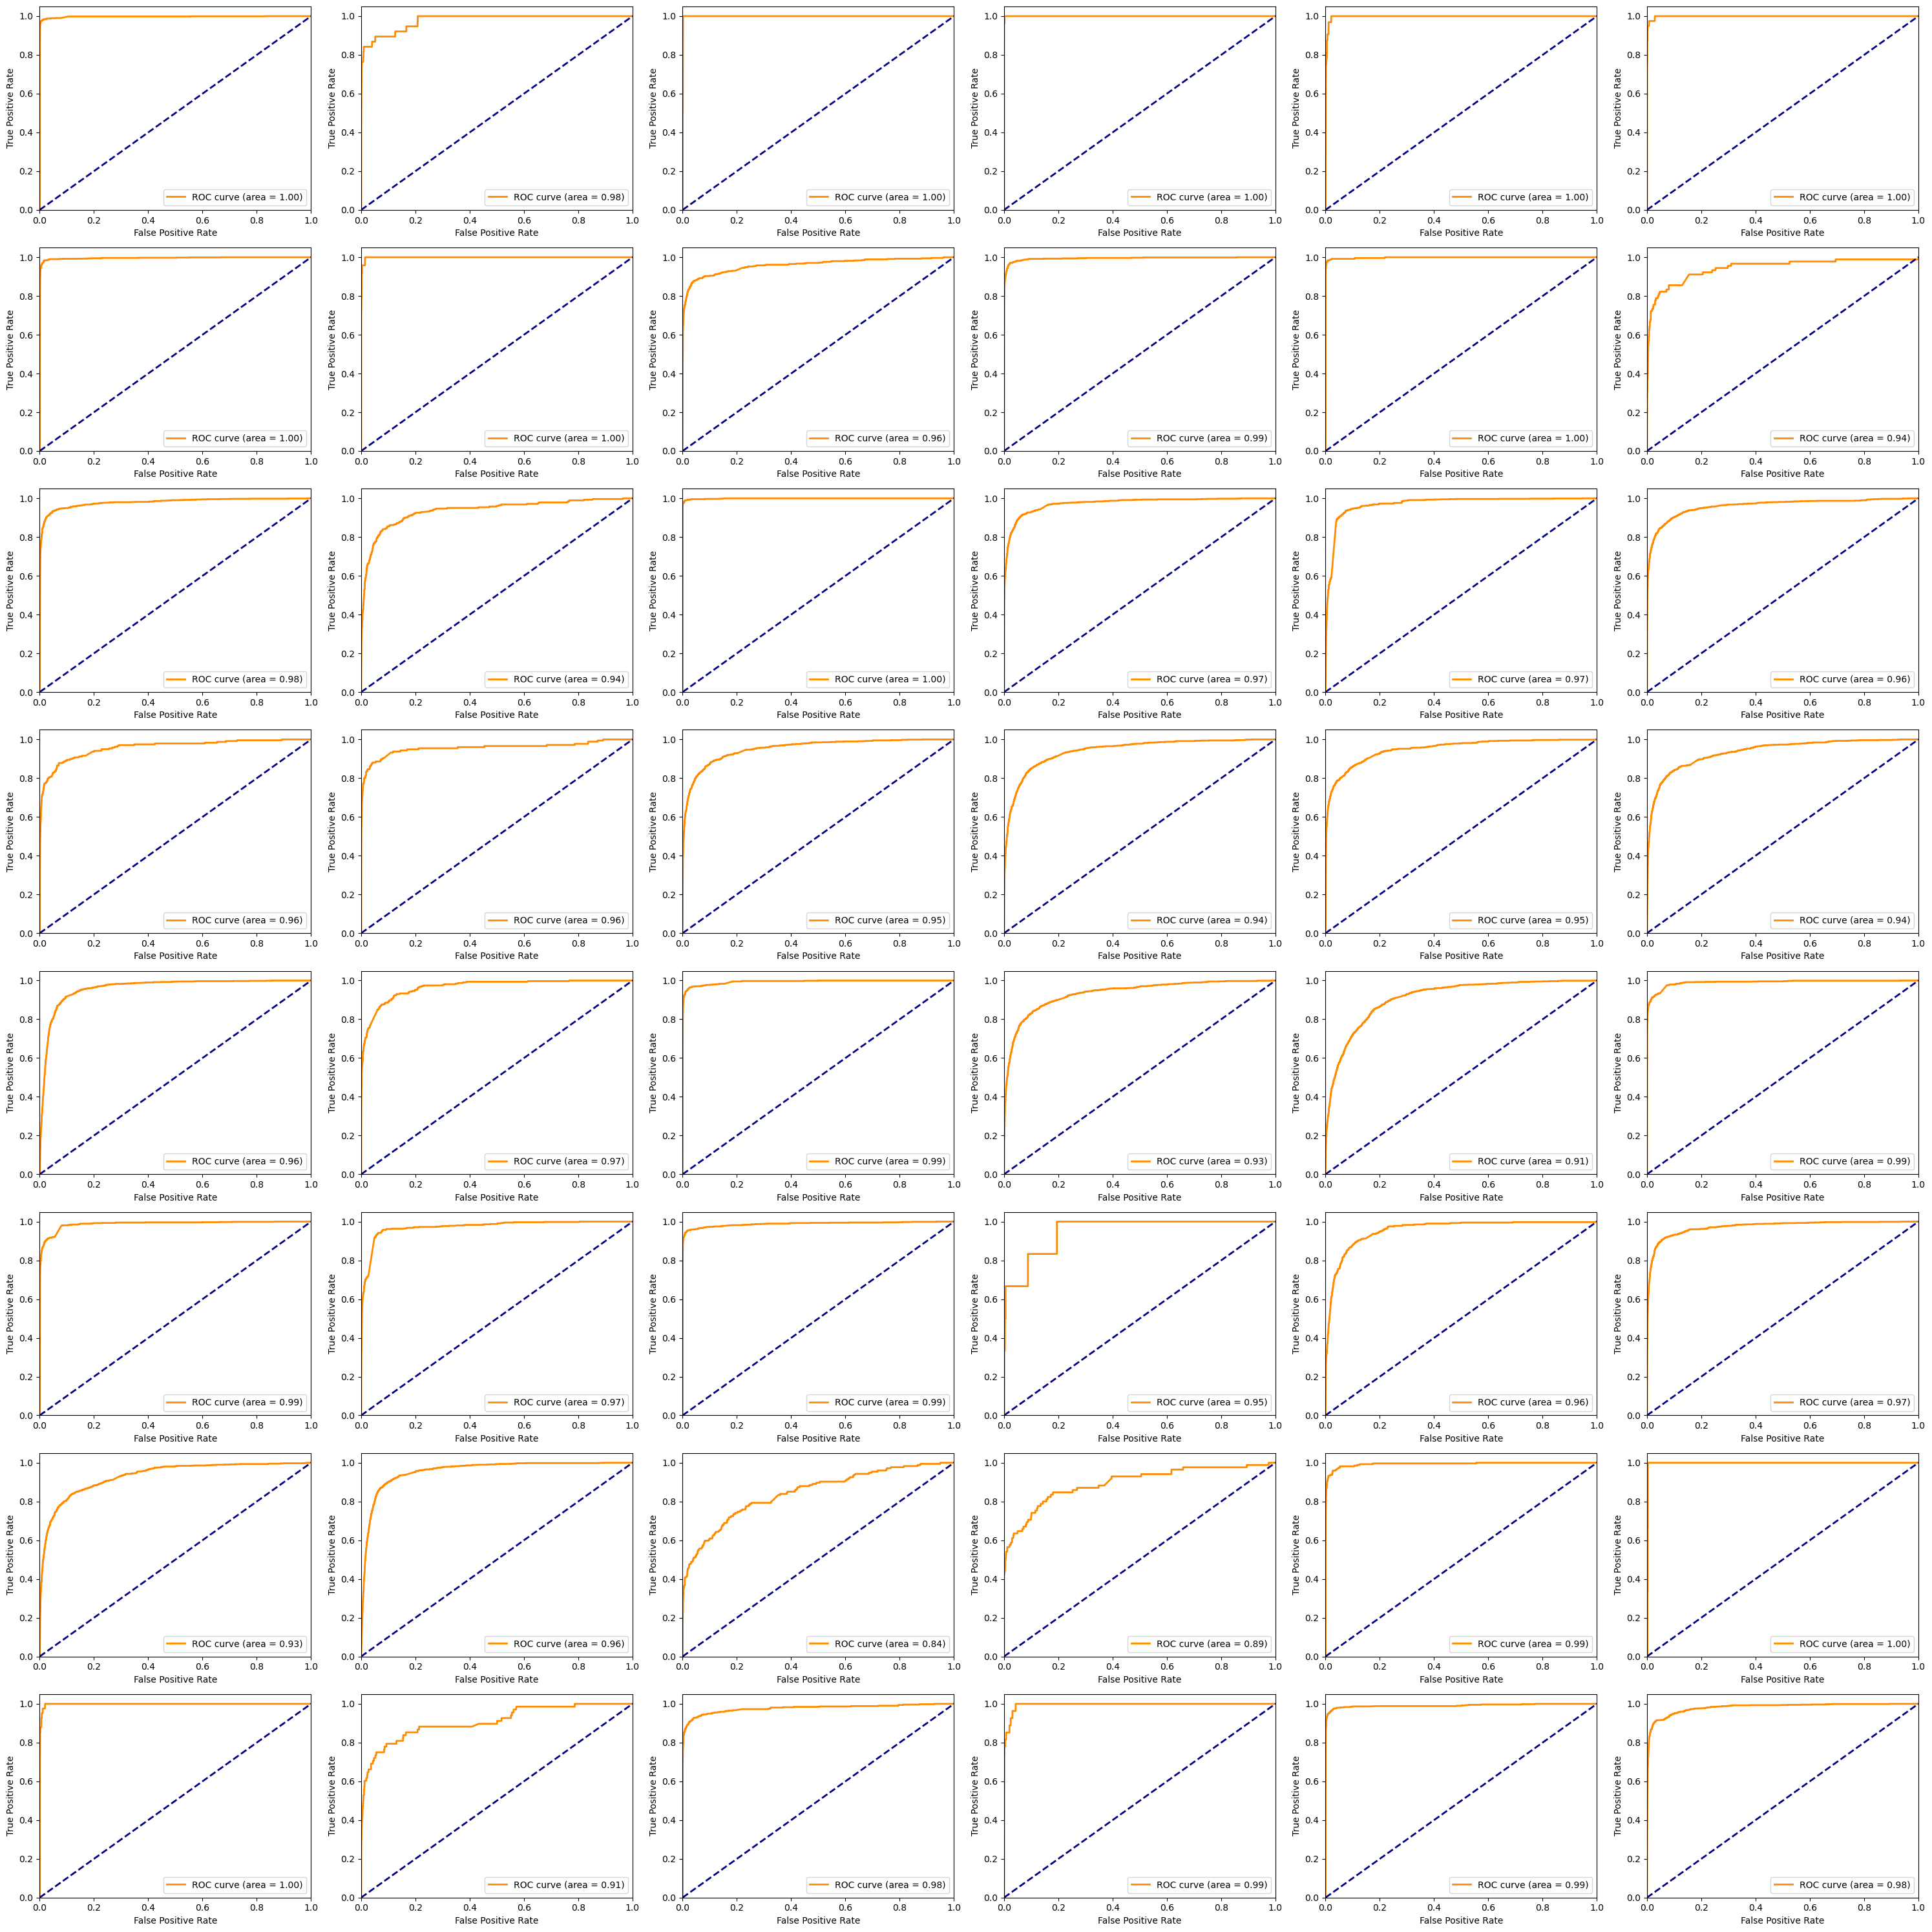

In [89]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Предполагается, что y_test_binarized и y_score уже вычислены
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 48
start_class=0
# Вычисление ROC AUC для каждого класса
for i in range(start_class, start_class + n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Создание фигуры для подграфиков
fig, axes = plt.subplots(8, 6, figsize=(30, 30))  # Размер фигуры можно настроить
axes = axes.ravel()  # Преобразование матрицы осей в плоский массив

for i in range(start_class, start_class + n_classes):
    axes[i].plot(fpr[i], tpr[i], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc[i])
    axes[i].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[i].set_xlim([0.0, 1.0])
    axes[i].set_ylim([0.0, 1.05])
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    #axes[i].set_title(f'Receiver Operating Characteristic for class {i}')
    axes[i].legend(loc="lower right")

plt.tight_layout()  # Автоматическая корректировка подграфиков для предотвращения наложения
plt.show()


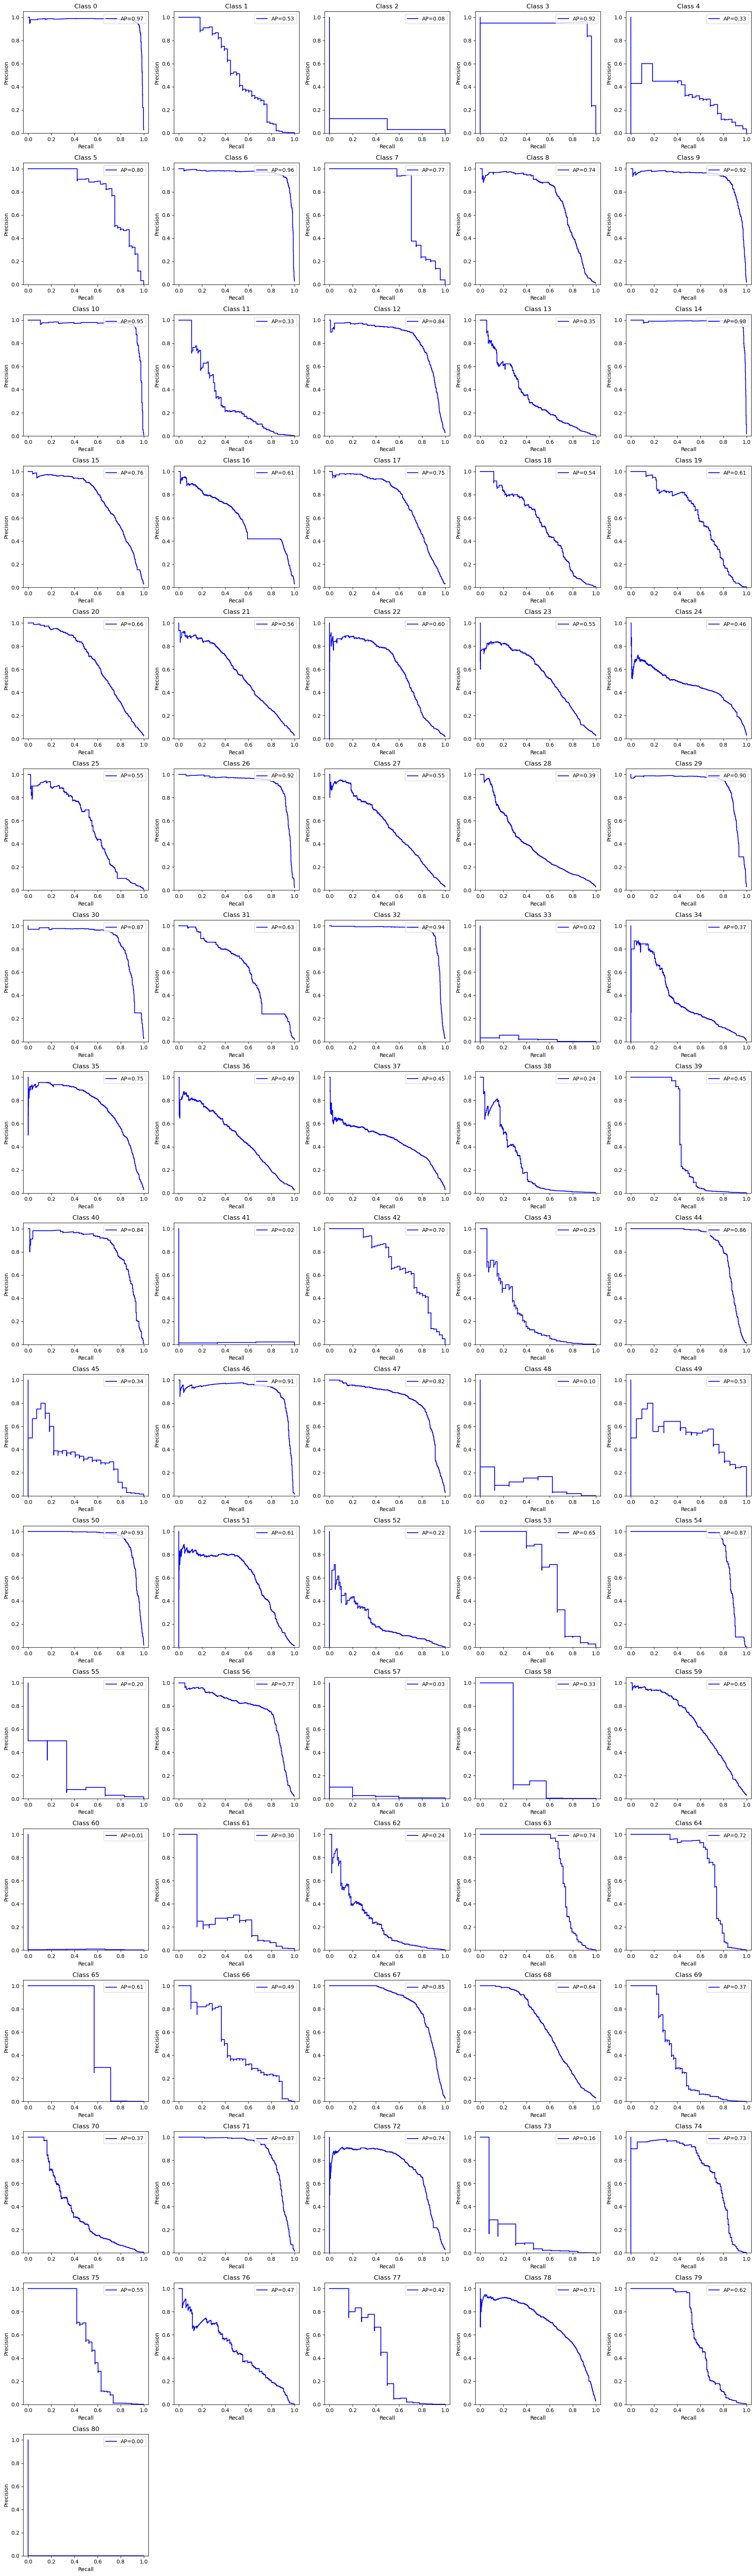

In [95]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
import numpy as np

# Предполагается, что y_test_binarized и y_score уже вычислены
n_classes = y_test_binarized.shape[1]  # количество классов

# Инициализация словарей
precision = dict()
recall = dict()
average_precision = dict()

# Расчет точности и полноты для каждого класса
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test_binarized[:, i], y_score[:, i])

# Выбор размера сетки подграфиков в зависимости от количества классов
rows = int(np.ceil(n_classes / 5))  # Допустим, мы хотим до 6 графиков в ряд
cols = 5

# Создание фигуры для подграфиков
figsize_per_subplot = 4  # Задаем желаемую ширину и высоту каждого подграфика
fig, axes = plt.subplots(rows, cols, figsize=(figsize_per_subplot * cols, figsize_per_subplot * rows))

for i, ax in enumerate(axes.flatten()):
    if i < n_classes:
        ax.step(recall[i], precision[i], where='post', color='b', label=f'AP={average_precision[i]:.2f}')
        ax.set_xlabel('Recall')
        ax.set_ylabel('Precision')
        ax.set_ylim([0.0, 1.05])
        ax.set_xlim([0.0, 1.0])
        ax.set_title(f'Class {i}')
        ax.legend(loc="upper right")
        ax.set_aspect('equal', adjustable='datalim')
    else:
        ax.set_visible(False)  # Скрываем лишние подграфики, если они есть

# Если количество классов не заполняет всю сетку, остальные подграфики можно очистить
for i in range(n_classes, rows * cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


In [17]:
labels2 = sample_t['2_steps']

In [18]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(embeddings, labels2, test_size=0.2, random_state=42)

In [20]:
from sklearn.linear_model import LogisticRegression
import time

start_time = time.time()
model2 = LogisticRegression(max_iter=2000, multi_class='ovr', solver ='newton-cg' )  # Увеличение количества итераций для сходимости
model2.fit(X_train2, y_train2)
print("--- %s seconds ---" % (time.time() - start_time))

--- 4048.527680873871 seconds ---


C:\Users\Sergey\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Sergey\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Sergey\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Sergey\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Sergey\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


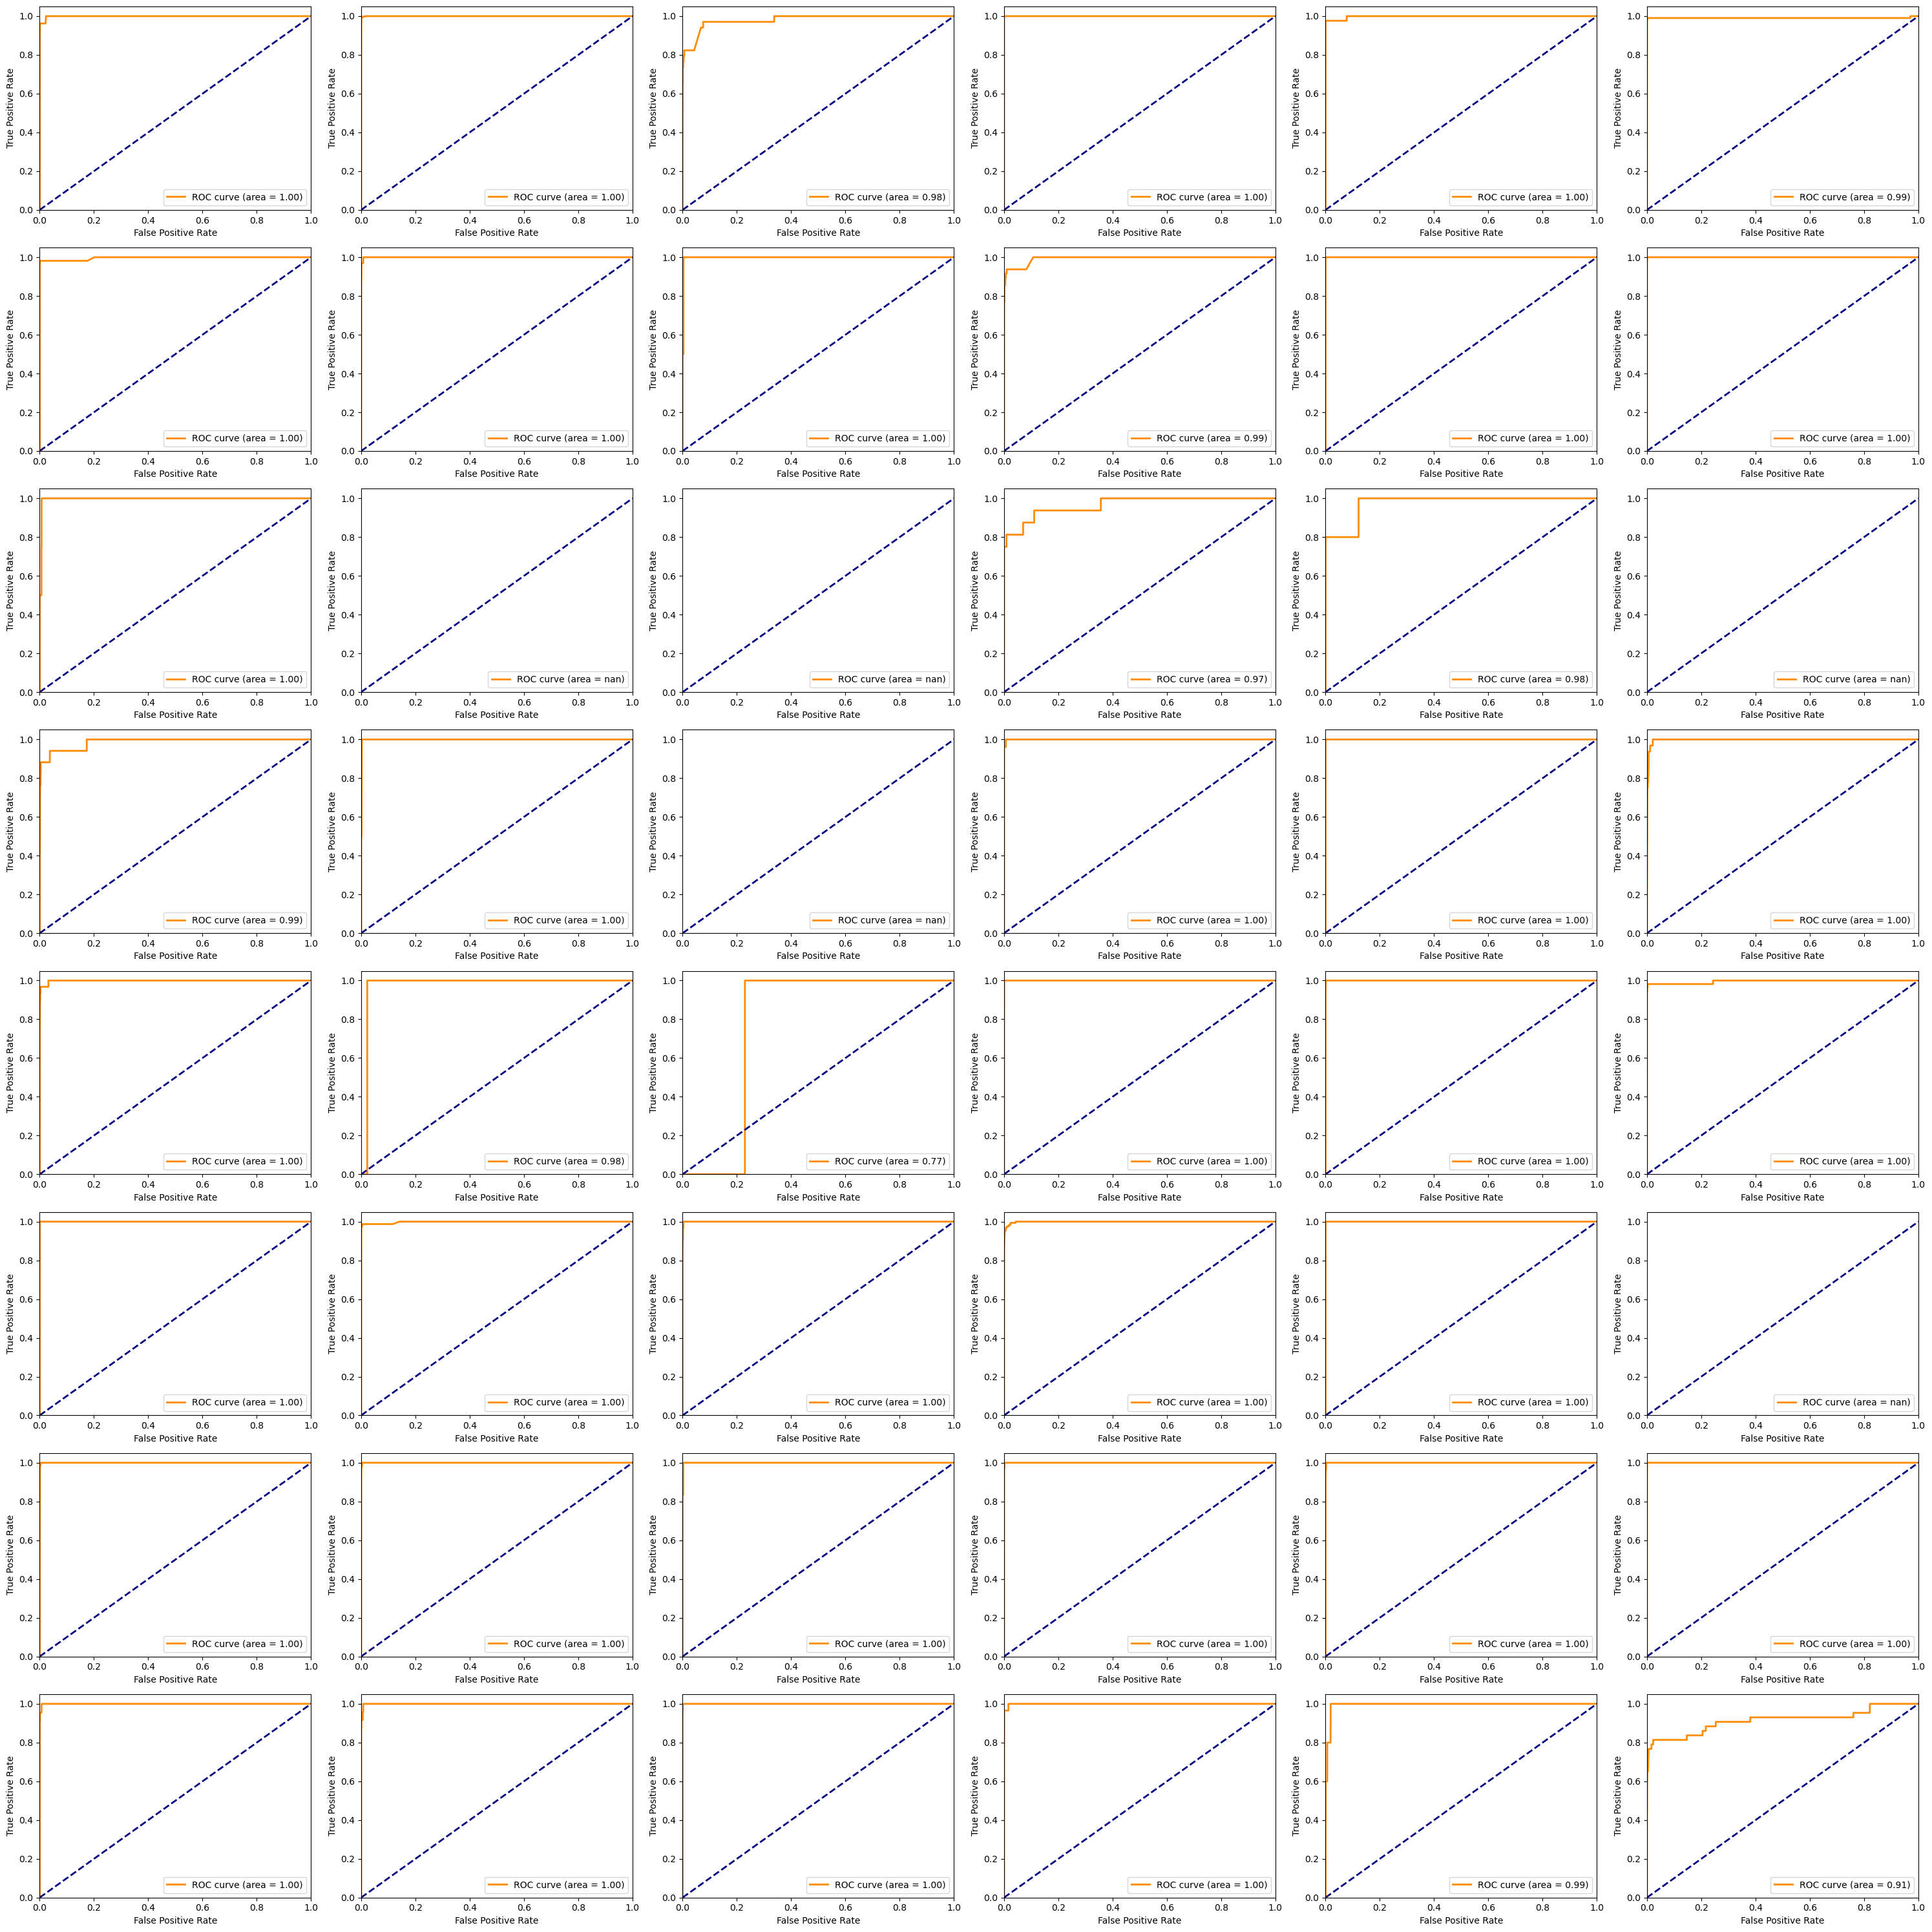

In [23]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Бинаризация меток для многоклассовой классификации
y_test_binarized2 = label_binarize(y_test2, classes=np.unique(labels2))

# Предсказание вероятностей для всех классов
y_score2 = model2.predict_proba(X_test2)
# Предполагается, что y_test_binarized и y_score уже вычислены
fpr2 = dict()
tpr2 = dict()
roc_auc2 = dict()
n_classes2 = 48
start_class2=0
# Вычисление ROC AUC для каждого класса
for i in range(start_class2, start_class2 + n_classes2):
    fpr2[i], tpr2[i], _ = roc_curve(y_test_binarized2[:, i], y_score2[:, i])
    roc_auc2[i] = auc(fpr2[i], tpr2[i])

# Создание фигуры для подграфиков
fig2, axes2 = plt.subplots(8, 6, figsize=(30, 30))  # Размер фигуры можно настроить
axes2 = axes2.ravel()  # Преобразование матрицы осей в плоский массив

for i in range(start_class2, start_class2 + n_classes2):
    axes2[i].plot(fpr2[i], tpr2[i], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc2[i])
    axes2[i].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes2[i].set_xlim([0.0, 1.0])
    axes2[i].set_ylim([0.0, 1.05])
    axes2[i].set_xlabel('False Positive Rate')
    axes2[i].set_ylabel('True Positive Rate')
    #axes[i].set_title(f'Receiver Operating Characteristic for class {i}')
    axes2[i].legend(loc="lower right")

plt.tight_layout()  # Автоматическая корректировка подграфиков для предотвращения наложения
plt.show()


In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
import numpy as np

# Предполагается, что y_test_binarized и y_score уже вычислены
n_classes2 = y_test_binarized2.shape[1]  # количество классов

# Инициализация словарей
precision2 = dict()
recall2 = dict()
average_precision2 = dict()

# Расчет точности и полноты для каждого класса
for i in range(n_classes2):
    precision2[i], recall2[i], _ = precision_recall_curve(y_test_binarized2[:, i], y_score2[:, i])
    average_precision2[i] = average_precision_score(y_test_binarized2[:, i], y_score2[:, i])

# Выбор размера сетки подграфиков в зависимости от количества классов
rows2 = int(np.ceil(n_classes2 / 5))  # Допустим, мы хотим до 6 графиков в ряд
cols2 = 5

# Создание фигуры для подграфиков
figsize_per_subplot2 = 4  # Задаем желаемую ширину и высоту каждого подграфика
fig2, axes2 = plt.subplots(rows2, cols2, figsize=(figsize_per_subplot2 * cols2, figsize_per_subplot2 * rows2))

for i, ax in enumerate(axes2.flatten()):
    if i < n_classes2:
        ax.step(recall2[i], precision2[i], where='post', color='b', label=f'AP={average_precision2[i]:.2f}')
        ax.set_xlabel('Recall')
        ax.set_ylabel('Precision')
        ax.set_ylim([0.0, 1.05])
        ax.set_xlim([0.0, 1.0])
        ax.set_title(f'Class {i}')
        ax.legend(loc="upper right")
        ax.set_aspect('equal', adjustable='datalim')
    else:
        ax.set_visible(False)  # Скрываем лишние подграфики, если они есть

# Если количество классов не заполняет всю сетку, остальные подграфики можно очистить
for i in range(n_classes2, rows2 * cols2):
    fig2.delaxes(axes2.flatten()[i])

plt.tight_layout()
plt.show()


C:\Users\Sergey\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\Sergey\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\Sergey\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\Sergey\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\Sergey\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\Sergey\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:891: UserWarn